In [3]:
import pickle
import numpy as np
from scipy import fftpack, signal, stats

# Load the .pkz file
with open('data/XJTU_bearing_dataset/35Hz12kN/Bearing1_1.pkz', 'rb') as f:
    data = pickle.load(f)

# Now 'data' contains the Python object stored in the .pkz file
signal_data = data[0][:, 0]

In [4]:
def calculate_fft_magnitude_at_dominant_frequency(signal):
    fft = fftpack.fft(signal)
    dominant_frequency_magnitude = np.max(np.abs(fft))
    return dominant_frequency_magnitude

def calculate_total_psd(signal):
    fft = fftpack.fft(signal)
    psd = np.abs(fft) ** 2
    total_psd = np.sum(psd) / len(signal)
    return total_psd

def calculate_spectral_centroid(signal):
    fft = fftpack.fft(signal)
    magnitude_spectrum = np.abs(fft)
    freqs = fftpack.fftfreq(len(signal))
    spectral_centroid = np.sum(magnitude_spectrum * freqs) / np.sum(magnitude_spectrum)
    return spectral_centroid

def calculate_spectral_flatness(signal):
    fft = fftpack.fft(signal)
    magnitude_spectrum = np.abs(fft)
    spectral_flatness = np.exp(np.mean(np.log(magnitude_spectrum + 1e-10))) / np.mean(magnitude_spectrum)
    return spectral_flatness

def calculate_spectral_roll_off(signal, roll_off_fraction=0.85):
    fft = fftpack.fft(signal)
    magnitude_spectrum = np.abs(fft)
    freqs = fftpack.fftfreq(len(signal))
    total_energy = np.sum(magnitude_spectrum)
    cumulative_energy = np.cumsum(magnitude_spectrum)
    idx = np.where(cumulative_energy >= roll_off_fraction * total_energy)[0][0]
    return freqs[idx]


In [5]:
import math
from scipy.ndimage import gaussian_filter


def calculate_rms(values):
    """Calculate Root Mean Square (RMS) of a list of numbers."""
    if not values.any():
        raise ValueError("The input list is empty")

    squared_values = [x**2 for x in values]  # Square all the values
    mean_of_squares = sum(squared_values) / len(values)  # Calculate the mean of the squares
    rms_value = math.sqrt(mean_of_squares)  # Take the square root of the mean
    return rms_value

def rme(signals):
    return np.array([calculate_rms(i) for i in signals])

def moving_average(signal, window_size=11):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

def Gaussian(signal, window_size=11):
    return gaussian_filter(signal, sigma=window_size)



In [6]:
def predict_time(data, nor=20):
    '''
    INPUT =========================================
    data: - type: numpy.ndarray
          - dtype: float32
          - shape: 1D (for example: (1802,))
    nor: length of normal data

    OUTPUT =======================================
    fpt: - type: int
         - value: an integer value in N indicating the First Passage Time
    '''

    normal = data[:nor]
    mean_normal = normal.mean()
    std_normal = normal.std()

    limit_up = mean_normal + 3 * std_normal
    limit_down = mean_normal - 3 * std_normal

    # Find where data exceeds limits
    exceed_indices = np.where((data > limit_up) | (data < limit_down))[0]

    # Find the first sequence of 3 consecutive out-of-limit points
    if len(exceed_indices) > 2:
        consecutive_counts = np.diff(exceed_indices) == 1
        first_consecutive_idx = np.where(consecutive_counts[:-1] & consecutive_counts[1:])[0]

        if first_consecutive_idx.size > 0:
            fpt = exceed_indices[first_consecutive_idx[0]]
            return fpt

    # If no such point exists, return 0 or an appropriate default value
    return 0

In [7]:
signal = rme(data[:, :, 0])
signal_smothed = Gaussian(signal, window_size=11)
fpt = predict_time(signal)
print(fpt, signal.shape, signal_smothed.shape)

69 (122,) (122,)


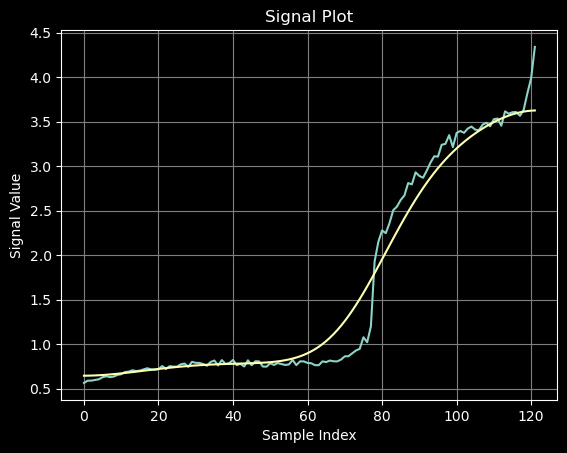

In [15]:
import matplotlib.pyplot as plt

# Set the style to dark background
plt.style.use('dark_background')

# Plot the signal with green color and grid
plt.plot(signal)
plt.plot(signal_smothed)
plt.grid(True, color='gray')  # Add grid with gray color

# Set title and axis labels with white text
plt.title('Signal Plot', color='white')
plt.xlabel('Sample Index', color='white')
plt.ylabel('Signal Value', color='white')

# Show the plot
plt.show()


In [44]:
True_labels = np.concatenate((np.ones(fpt, ), np.linspace(fpt, 0, num=len(signal)-fpt)/ fpt)) * 100.
Predicted_labels = True_labels + np.concatenate((np.random.uniform(-0.02, 0, size=fpt), np.random.uniform(-0.03, 0.03, size=len(True_labels)-fpt))) * 100.

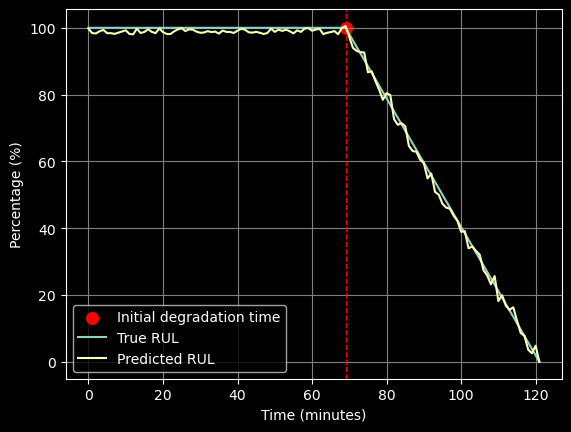

In [45]:
import matplotlib.pyplot as plt

# Set the style to dark background
plt.style.use('dark_background')

if fpt is not None and fpt < len(data):
    plt.axvline(x=fpt, color='red', linestyle='--', linewidth=1)
    plt.scatter(fpt, True_labels[fpt], color='red', s=70,  label='Initial degradation time')
# Plot the signal with green color and grid
plt.plot(True_labels, label="True RUL")
plt.plot(Predicted_labels, label="Predicted RUL")
plt.grid(True, color='gray')  # Add grid with gray color

# Set title and axis labels with white text
plt.ylabel('Percentage (%)', color='white')  # Change x-axis label
plt.xlabel('Time (minutes)', color='white')
plt.legend()

# Show the plot
plt.show()

In [ ]:
.loader,
.loader:after {
    border-radius: 50%;
    width: 10.25em; 
    height: 10.25em;
}
.loader {
    margin: 3.75em auto;
    font-size: 0.625em;
    position: relative;
    text-indent: -9999em;
    border-top: 1.1em solid rgba(255, 255, 255, 0.2);
    border-right: 1.1em solid rgba(255, 255, 255, 0.2);
    border-bottom: 1.1em solid rgba(255, 255, 255, 0.2);
    border-left: 1.1em solid #ffffff;
    -webkit-transform: translateZ(0);
    -ms-transform: translateZ(0);
    transform: translateZ(0);
    -webkit-animation: load8 1.1s infinite linear;
    animation: load8 1.1s infinite linear;
}

@-webkit-keyframes load8 {
    0% {
        -webkit-transform: rotate(0deg);
        transform: rotate(0deg);
    }
    100% {
        -webkit-transform: rotate(360deg);
        transform: rotate(360deg);
    }
}
@keyframes load8 {
    0% {
        -webkit-transform: rotate(0deg);
        transform: rotate(0deg);
    }
    100% {
        -webkit-transform: rotate(360deg);
        transform: rotate(360deg);
    }
}



.gradient-text {
    background: linear-gradient(to right, #70B5FF, #70E2FF, #7088FF, #4CFCE7, #8670FF); 
    filter: brightness(100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}

:root {
    --hover-background-color: #f0f0f0;
    --primary-color: #E9E7E5;
    --secondary-color: rgba(233, 231, 229, 0.65);
    --background-color: black;
    --border-color: #2C3D4F;
    --image-shadow: 0.125em  0.125em 0.25em rgba(0, 0, 0.2, 0.2);
}

.box-transition{
    transition: transform 0.2s ease-in-out;
}
.box-transition:hover {
    transform: scale(1.1); /* Scale the box to 1.2 times its original size */
}

ul, p, u, label, select {
    color: var(--primary-color);
    font-size: 1.25em;
    margin-bottom: 1em;
}

li{
    margin-left: 0.6em;
    margin-bottom: 1em;
}

header {
    color: var(--primary-color);
    background-color: var(--background-color);
    text-align: center;
}

body {
    font-family: MetricHPEXS,Arial,sans-serif;
    background-color: var(--background-color);
    color: var(--primary-color);
}

h1 {
    font-size: 3.5em; /* Adjust based on your design */
    margin-bottom: 0.5em; /* Add spacing between h1 and subsequent elements */
}

h2 {
    font-size: 2.8em; /* Adjust based on your design */
    margin-bottom: 1em; /* Add spacing between h2 and subsequent elements */
}

h3 {
    font-size: 2.2em; /* Adjust based on your design */
    margin-bottom: 0.5em; /* Add spacing between h3 and subsequent elements */
}

h4 {
    font-size: 1.8em; /* Adjust based on your design */
    margin-bottom: 0.5em; /* Add spacing between h4 and subsequent elements */
}

.description {
    color: var(--secondary-color); 
    font-size: 0.8em; 
    margin-bottom:0.15em;
}

.card {
    border-radius: 1.25em;
}

.section {
    width: 100%;
    padding: 0; 
    padding-bottom: 0; 
    text-align: center;
}


footer {
    background-color: var(--background-color);
    color: var(--primary-color);
    padding: 1.25em;
    text-align: center;
}

.contain {
    margin-left: 2.5em; 
    margin-right: 2.5em; 
}

.page-banner {
    position: static;
    width: 100vw; /* Set the width to 100% of the viewport width */
    margin-top: 4em;
    margin-bottom: 9em;
}

html {
    margin: 0; /* Remove default margin */
    padding: 0; /* Remove default padding */
    overflow-x: auto; /* Enable horizontal scrolling if content overflows */
    overflow-y: auto; /* Enable vertical scrolling if content overflows */
}


.button_slide {
    padding: 0.3125em 0.625em; 
    color: var(--background-color);
    background-color: var(--primary-color);
    border: 0.0625em solid var(--border-color);
    border-radius: 1.25em; 
    display: inline-block;
    letter-spacing: 0.0625em; 
    cursor: pointer;
    box-shadow: inset 0 0 0 0 #95BDE8;
    -webkit-transition: ease-out 0.4s;
    -moz-transition: ease-out 0.4s;
    transition: ease-out 0.4s;
}


.btn-primary, .btn-secondary {
    background-color: var(--border-color);
    border: 1px solid var(--border-color);
    border-radius: 1.25em; /* You had this already correct */
}


.slide_right:hover {
    color: white;
    box-shadow: inset 25em 0 0 0 var(--border-color);
}

.button-wrapper{
    text-align: center;
    margin-bottom: 1.25em;
}